# Distâncias Até a Estação de Metrô Mais Próxima

## Fonte de Dados

http://www.data.rio/

http://www.data.rio/datasets/esta%C3%A7%C3%B5es-metr%C3%B4

https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [3]:
%matplotlib inline
%load_ext nb_black
import geopandas as gpd

<IPython.core.display.Javascript object>

In [4]:
#carrega arquivo de localialçao das estações de metrô
metro = gpd.read_file('../Dados/Transporte/Metrô/Estações_Metrô.geojson')

<IPython.core.display.Javascript object>

In [5]:
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36485 -22.80662)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845 -22.81627)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964 -22.82452)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34326 -22.83148)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386 -22.84269)


<IPython.core.display.Javascript object>

In [6]:
metro.crs

{'init': 'epsg:4326'}

<IPython.core.display.Javascript object>

In [7]:
#converte o sistema de coordanadas do arquivo de estações para UTM para usar a unidade KM
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<IPython.core.display.Javascript object>

In [6]:
metro.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [9]:
#dados convertidos
metro.head()

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.827 7476.959)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.471 7475.883)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.365 7474.959)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.012 7474.182)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.963 7472.930)


<IPython.core.display.Javascript object>

In [10]:
#carrega o mapa da cidade e o dataset de imóveis sem os outliers
rj = gpd.read_file('../Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../Dados/Mapas/RJ-DATASET/RJ-DATASET-CORRETO.shp')

<IPython.core.display.Javascript object>

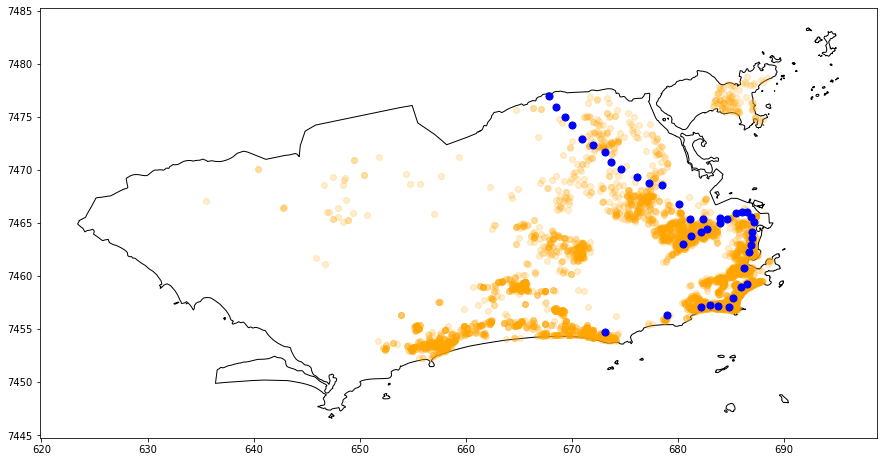

<IPython.core.display.Javascript object>

In [13]:
#cria o gráfico base com o mapa da cidade
base = rj.plot(color='white', edgecolor='black', figsize=(15, 8))
# usa o mapa básico como entrada para plotar os dados dos imóveis
geo_dados.plot(ax=base, color='orange', alpha=0.2)
# usa o mapa básico para plotar os markadores das estações com tamanho 50
metro.plot(ax=base, color='blue', markersize = 50)

Area                                                  138
Bairro                           Recreio dos Bandeirantes
Cidade                                     Rio de Janeiro
Endereco                              Rua Vicente Scofano
Estado                                                 RJ
Latitude                                         -23.0165
Longitude                                        -43.4629
Quartos                                                 3
Suites                                                  1
Vagas                                                   3
Tipo                                          Apartamento
Transacao                                           Venda
Valor                                             1095000
geometry      POINT (657.5137068691058 7453.832425203198)
Dist_Metro                                        15.6229
Name: 0, dtype: object

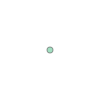

<IPython.core.display.Javascript object>

In [22]:
#seleciona um imóvel para teste e confere seu ponto
display(geo_dados.iloc[0])
display(geo_dados.iloc[0].geometry)

In [23]:
#calcula as distâncias em linha RETA de todas estações de metro até o imóvel do ponto iloc[0] de teste
distances = metro.distance(geo_dados.iloc[0].geometry)
type(distances)

pandas.core.series.Series

<IPython.core.display.Javascript object>

In [18]:
#10 primeiras distancias calculadas
distances[0:10]

0    25.321516
1    24.623350
2    24.224237
3    23.881158
4    23.357575
5    23.523396
6    23.658163
7    23.401048
8    23.644084
9    24.209373
dtype: float64

<IPython.core.display.Javascript object>

In [19]:
# imprime a menor distancia
distances.min()

15.62293882499506

<IPython.core.display.Javascript object>

In [24]:
#gera coluna no dataset de imóveis com a distancia de cada ponto até a estação mais próxima
geo_dados['Dist_Metro'] = geo_dados['geometry'].apply(lambda x: metro.distance(x).min())

<IPython.core.display.Javascript object>

In [25]:
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry,Dist_Metro
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (657.514 7453.832),15.622939
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (670.524 7461.803),7.530741
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (674.345 7469.440),0.736973
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (662.701 7457.284),10.718039
4,260,Recreio dos Bandeirantes,Rio de Janeiro,Rua Desembargador Paulo Alonso,RJ,-23.018927,-43.477505,3,1,2,Apartamento,Venda,1160000,POINT (656.019 7453.574),17.131159


<IPython.core.display.Javascript object>

In [26]:
#exibe o coeficiente de correlação de pearson de todas colunas
geo_dados.corr()

,Area,Latitude,Longitude,Quartos,Suites,Vagas,Valor,Dist_Metro
Area,1.000000,-0.289299,0.029982,0.681112,0.585817,0.594699,0.724397,-0.036671
Latitude,-0.289299,1.000000,0.292822,-0.225226,-0.346480,-0.274707,-0.299038,-0.217864
Longitude,0.029982,0.292822,1.000000,-0.016882,-0.221548,-0.283960,0.191868,-0.874788
Quartos,0.681112,-0.225226,-0.016882,1.000000,0.529611,0.520499,0.481216,0.021794
Suites,0.585817,-0.346480,-0.221548,0.529611,1.000000,0.621140,0.464075,0.188521
Vagas,0.594699,-0.274707,-0.283960,0.520499,0.621140,1.000000,0.456596,0.215787
Valor,0.724397,-0.299038,0.191868,0.481216,0.464075,0.456596,1.000000,-0.195641
Dist_Metro,-0.036671,-0.217864,-0.874788,0.021794,0.188521,0.215787,-0.195641,1.000000


<IPython.core.display.Javascript object>

In [29]:
#identifica apenas o coeficiente de correlação da coluna target (VALOR), com a nova coluna de distância até a estação mais próxima
coef = geo_dados['Valor'].corr(geo_dados['Dist_Metro'])

#dado que o valor resultante do coeficiente é negativo, quer dizer que conforme maior a distancia da estação, o número fica um negativo maior e consequentemente, 
#reduz o valor do imóvel, revisar coeficiente de correção de pearson
coef

-0.19564083161686813

<IPython.core.display.Javascript object>

In [31]:
display(1 * coef) #1 km
display(10 * coef) #10 km

-0.19564083161686813

-1.9564083161686812

<IPython.core.display.Javascript object>

In [32]:
geo_dados.to_file('../Dados/Mapas/RJ-DATASET/RJ-DATASET-DIST.shp')

<IPython.core.display.Javascript object>